In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('fitflow.csv')
colormap1 = ['#FFB6C1', '#ADD8E6', '#D8B7FF']
colormap2 = ['#BAC8f9', '#0CC0DF', '#C8B3EE', '#AECfB4']

# 🔎Initial Data Exploration 

In [142]:
df.head(5)

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,...,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,...,3,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,...,7,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,...,7,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,...,8,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,...,1,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   participant_id            687701 non-null  int64  
 1   date                      687701 non-null  object 
 2   age                       687701 non-null  int64  
 3   gender                    687701 non-null  object 
 4   height_cm                 687701 non-null  float64
 5   weight_kg                 687701 non-null  float64
 6   activity_type             687701 non-null  object 
 7   duration_minutes          687701 non-null  int64  
 8   intensity                 687701 non-null  object 
 9   calories_burned           687701 non-null  float64
 10  avg_heart_rate            687701 non-null  int64  
 11  hours_sleep               687701 non-null  float64
 12  stress_level              687701 non-null  int64  
 13  daily_steps               687701 non-null  i

In [144]:
df.columns

Index(['participant_id', 'date', 'age', 'gender', 'height_cm', 'weight_kg',
       'activity_type', 'duration_minutes', 'intensity', 'calories_burned',
       'avg_heart_rate', 'hours_sleep', 'stress_level', 'daily_steps',
       'hydration_level', 'bmi', 'resting_heart_rate',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'health_condition', 'smoking_status', 'fitness_level'],
      dtype='object')

In [145]:
df.shape

(687701, 22)

In [146]:
df.isnull().sum()

participant_id                   0
date                             0
age                              0
gender                           0
height_cm                        0
weight_kg                        0
activity_type                    0
duration_minutes                 0
intensity                        0
calories_burned                  0
avg_heart_rate                   0
hours_sleep                      0
stress_level                     0
daily_steps                      0
hydration_level                  0
bmi                              0
resting_heart_rate               0
blood_pressure_systolic          0
blood_pressure_diastolic         0
health_condition            490275
smoking_status                   0
fitness_level                    0
dtype: int64

## ⭕Handling Missing Values

In [147]:
null_percentage = df['health_condition'].isnull().mean() * 100
print(f"Null percentage: {null_percentage:.2f}%")

Null percentage: 71.29%


In [148]:
df['health_condition'].value_counts(dropna=False)


health_condition
NaN             490275
Hypertension     99437
Diabetes         64754
Asthma           33235
Name: count, dtype: int64

In [149]:
df['health_condition'] = df['health_condition'].fillna('No Health Condition')
df.isnull().sum()

participant_id              0
date                        0
age                         0
gender                      0
height_cm                   0
weight_kg                   0
activity_type               0
duration_minutes            0
intensity                   0
calories_burned             0
avg_heart_rate              0
hours_sleep                 0
stress_level                0
daily_steps                 0
hydration_level             0
bmi                         0
resting_heart_rate          0
blood_pressure_systolic     0
blood_pressure_diastolic    0
health_condition            0
smoking_status              0
fitness_level               0
dtype: int64

# 👩🏽👨🏽 1. Demographic Analysis 

In [151]:
# Categorizing Age 
def categorize_age(age):
    if 18 <= age <= 30:
        return 'Young Adult'
    elif 31 <= age <= 40:
        return 'Adult'
    elif 41 <= age <= 50:
        return 'Middle-Aged Adult'
    elif 51 <= age <= 64:
        return 'Older Adult'
    else:
        return 'Out of range'  
df['age_category'] = df['age'].apply(categorize_age)
# Grouping the dataset by 'age_category' and 'gender', then counting the occurrences of each combination


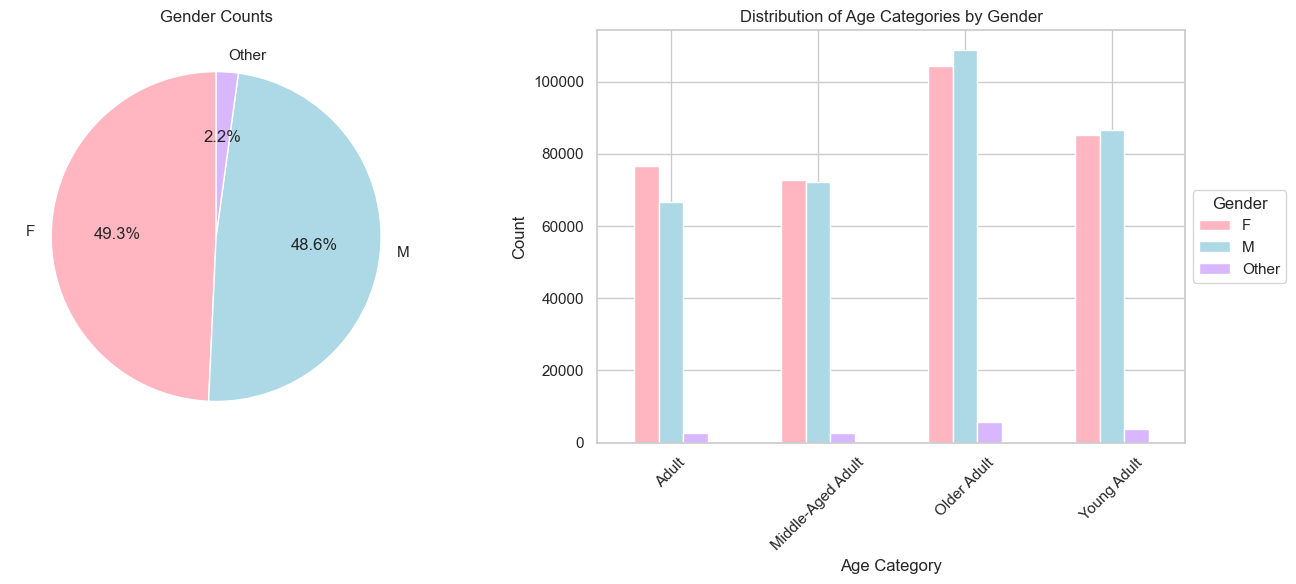

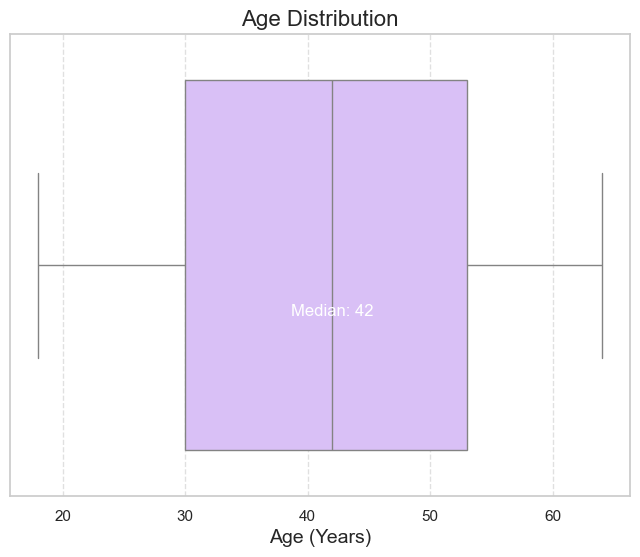

In [165]:
age_gender_dist = df.groupby(['age_category', 'gender']).size().unstack()
gender_counts = df['gender'].value_counts()

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting gender counts as a pie chart
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colormap1, startangle=90)
axes[0].set_title('Gender Counts')

# Plotting age-gender distribution as a bar chart
age_gender_dist.plot(kind='bar', color=colormap1, ax=axes[1])
axes[1].set_title('Distribution of Age Categories by Gender')
axes[1].set_xlabel('Age Category')
axes[1].set_ylabel('Count')
axes[1].legend(title='Gender', loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust the layout to ensure the elements don't overlap
plt.tight_layout()

# Display the plot
plt.show()

# Summary Statistics for Age column

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'], color='#D8B7FF')
# Median
median_age = df['age'].median()
plt.text(median_age, 0.1, f"Median: {median_age:.0f}", color='white', ha='center', va='center')

plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age (Years)', fontsize=14, )
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

🔎
- The age in this dataset has a mean of 41.66 years, with a fairly wide spread (standard deviation of 13.58). Most participants are between the ages of 18 and 64, with the median age being 42, and the majority falling between 30 and 53. 

**Gender:**
- **Females (F):** There are 338,856 female entries, which is the largest group in the dataset. This suggests that the majority of participants or individuals in the data are women.
- **Males (M):** There are 334,023 male entries, which is a close second to females. The gender distribution appears fairly balanced between males and females.
- **Other:** There are 14,822 entries classified as "Other," which represents a much smaller portion of the dataset. This could include individuals who identify as non-binary or another gender outside the traditional male/female categories. 

**Age Categories:**
- Males slightly lead in Young Adult and Older Adult, while females slightly lead in Adult. The Middle-Aged Adult category is nearly equal, with a small "Other" category in all age groups.

## 🩺 1.1 BMI Categories

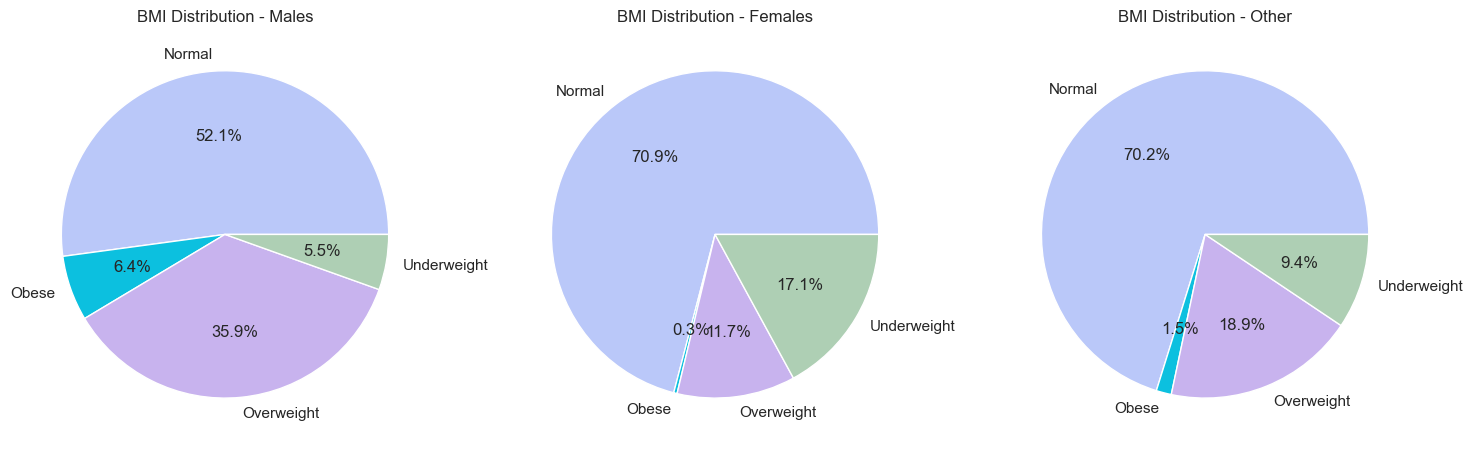

In [153]:
# Categorizing Bmi 
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight' 
    else:
        return 'Obese'

# Apply BMI categorization
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

bmi_bygender = pd.crosstab([df['bmi_category'], df['age_category']], df['gender'])

# Create a figure with subplots for Males, Females, and Other
plt.figure(figsize=(15, 8))

# Plot pie chart for Males
plt.subplot(1, 3, 1)
male_data = bmi_bygender['M'].groupby(level=0).sum()
plt.pie(male_data, labels=male_data.index, autopct='%1.1f%%', colors=colormap2[:len(male_data)])
plt.title('BMI Distribution - Males')

# Plot pie chart for Females
plt.subplot(1, 3, 2)
female_data = bmi_bygender['F'].groupby(level=0).sum()
plt.pie(female_data, labels=female_data.index, autopct='%1.1f%%', colors=colormap2[:len(female_data)])
plt.title('BMI Distribution - Females')

# Plot pie chart for Other
plt.subplot(1, 3, 3)
other_data = bmi_bygender['Other'].groupby(level=0).sum()
plt.pie(other_data, labels=other_data.index, autopct='%1.1f%%', colors=colormap2[:len(other_data)])
plt.title('BMI Distribution - Other')

plt.tight_layout()
plt.show()



🔎 
- We have a high number of individuals in the "Normal" category, particularly in the "Older Adult" and "Adult" age categories. More women are in the "Normal" and "Underweight" categories, while more men are in the "Obese" and "Overweight" categories, especially in the middle-aged group.

## 🚬 1.5 Smoking Status 

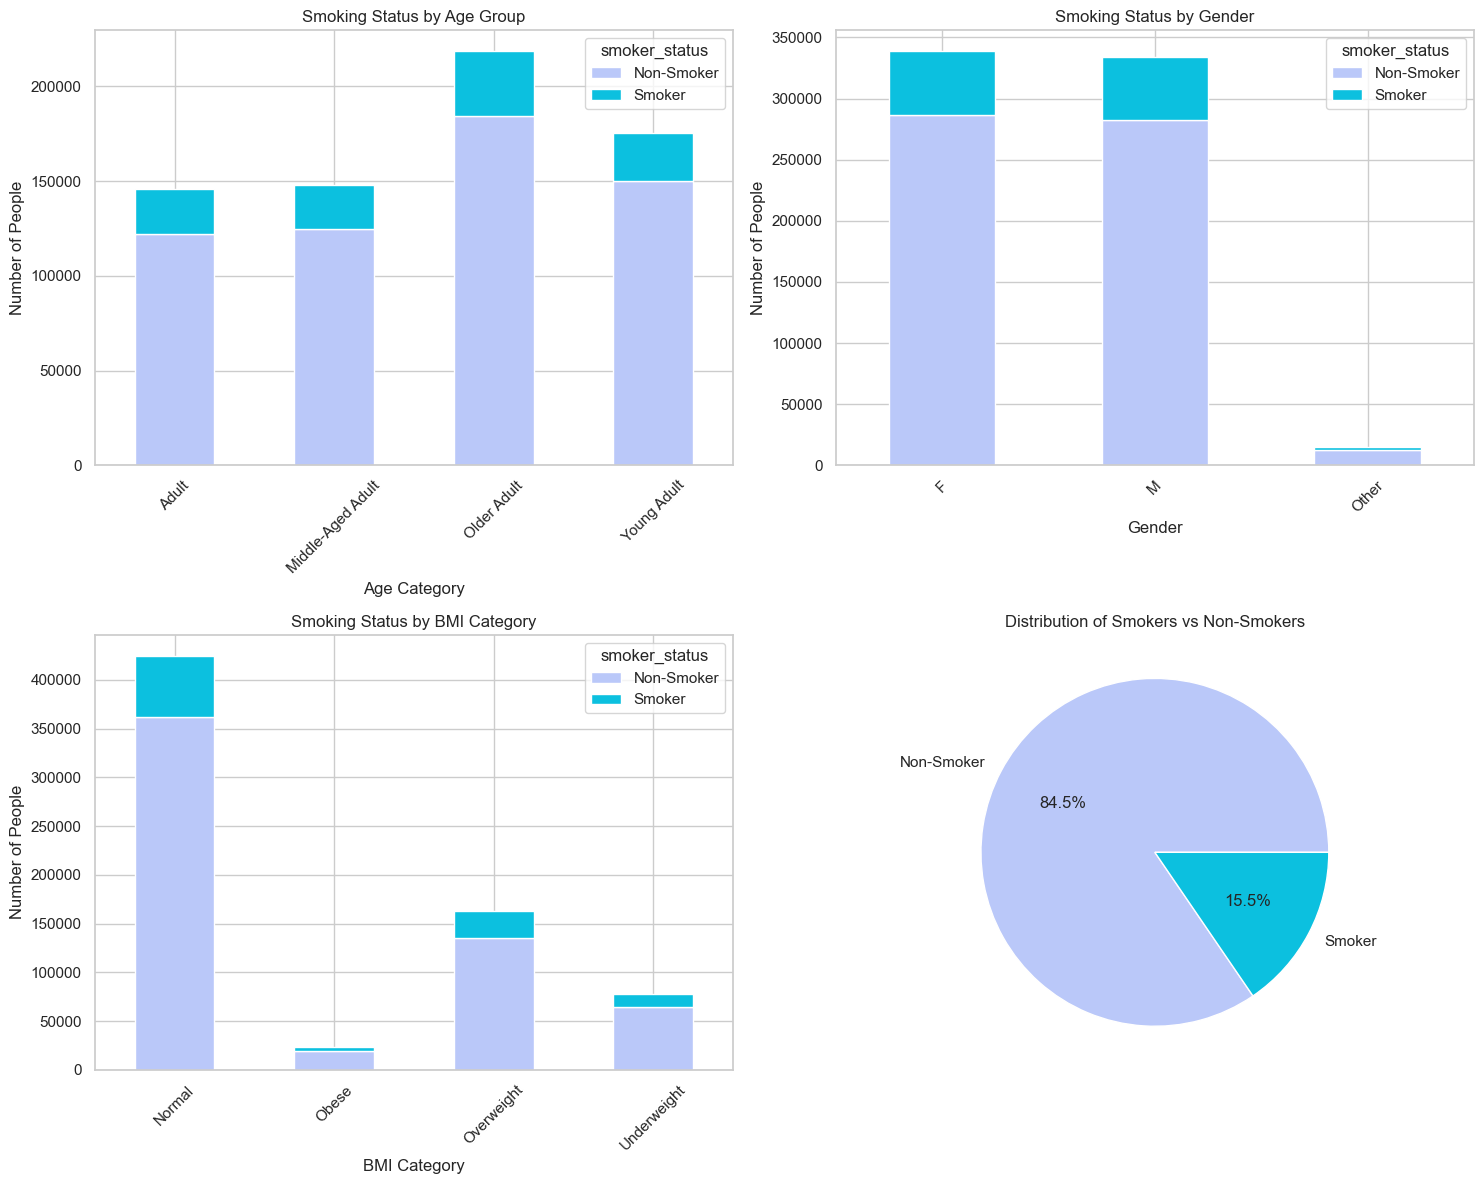

In [154]:
# Categorizing smokers vs non-smokers 
df['smoker_status'] = df['smoking_status'].apply(lambda x: 'Smoker' if x == 'Current' else 'Non-Smoker')

# Grouping data
smoker_by_age = df.groupby(['age_category', 'smoker_status']).size().unstack(fill_value=0)
smoker_by_gender = df.groupby(['gender', 'smoker_status']).size().unstack(fill_value=0)
smoker_by_bmi = df.groupby(['bmi_category', 'smoker_status']).size().unstack(fill_value=0)
smoking_distribution = df['smoker_status'].value_counts(normalize=True) * 100

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot Smoking Status by Age Group
smoker_by_age.plot(kind='bar', stacked=True, color=colormap2, ax=axes[0, 0])
axes[0, 0].set_title('Smoking Status by Age Group')
axes[0, 0].set_xlabel('Age Category')
axes[0, 0].set_ylabel('Number of People')
axes[0, 0].set_xticklabels(smoker_by_age.index, rotation=45)

# Plot Smoking Status by Gender
smoker_by_gender.plot(kind='bar', stacked=True, color=colormap2, ax=axes[0, 1])
axes[0, 1].set_title('Smoking Status by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Number of People')
axes[0, 1].set_xticklabels(smoker_by_gender.index.get_level_values(0), rotation=45)

# Plot Smoking Status by BMI Category
smoker_by_bmi.plot(kind='bar', stacked=True, color=colormap2, ax=axes[1, 0])
axes[1, 0].set_title('Smoking Status by BMI Category')
axes[1, 0].set_xlabel('BMI Category')
axes[1, 0].set_ylabel('Number of People')
axes[1, 0].set_xticklabels(smoker_by_bmi.index, rotation=45)

# Plot Smoking Distribution (Pie Chart)
axes[1, 1].pie(smoking_distribution, labels=smoking_distribution.index, autopct='%1.1f%%', colors=colormap2)
axes[1, 1].set_title('Distribution of Smokers vs Non-Smokers')

# Adjust layout
plt.tight_layout()
plt.show()


🔎 
- The data reveals that across all age categories, genders, and BMI categories, the proportion of non-smokers consistently outweighs that of smokers. The percentage of smokers is relatively low, ranging from around 14% to 16%, while non-smokers account for 83% to 85%. The trend is similar across age categories, with young adults showing the highest percentage of non-smokers (85.5%) and the lowest percentage of smokers (14.5%). Gender and BMI category comparisons show slight variations, but overall, the data suggests that non-smoking behavior is predominant in the population, regardless of age, gender, or BMI.

# 🤸🏽‍♀️2. Physical Activity

## 👩🏽🤸🏽‍♀️2.1 Activity Type Popularity 

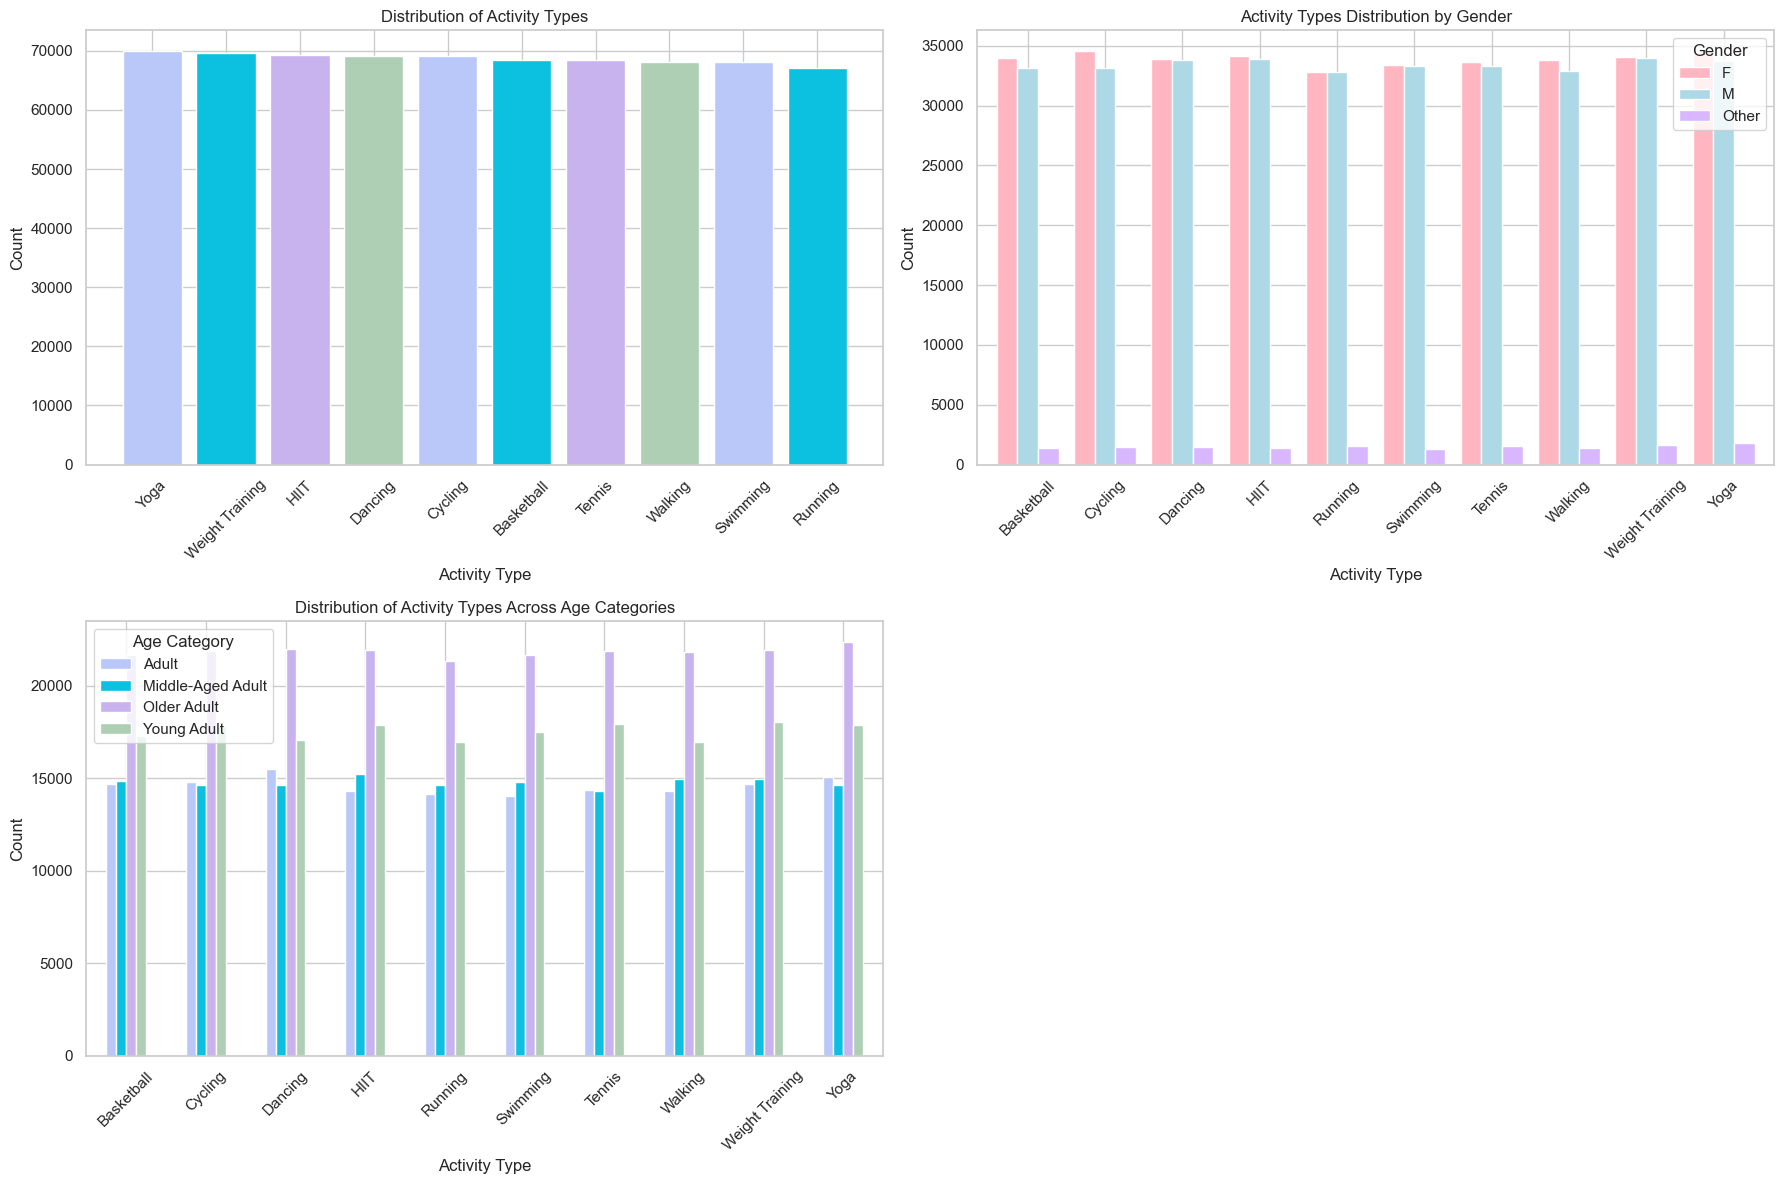

In [155]:
activity_counts = df["activity_type"].value_counts()
activity_type_bygender = df.groupby(['activity_type', 'gender']).size().unstack()
activity_type_byage = df.groupby(['activity_type', 'age_category']).size().unstack()

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot the distribution of activity types
axes[0, 0].bar(activity_counts.index, activity_counts.values, color=colormap2)
axes[0, 0].set_title('Distribution of Activity Types')
axes[0, 0].set_xlabel('Activity Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot the activity types by gender
activity_type_bygender.plot(kind='bar', width=0.8, color=colormap1, ax=axes[0, 1])
axes[0, 1].set_title('Activity Types Distribution by Gender')
axes[0, 1].set_xlabel('Activity Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Gender')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot the distribution of activity types across different age categories
activity_type_byage.plot(kind='bar', color=colormap2, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Activity Types Across Age Categories')
axes[1, 0].set_xlabel('Activity Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Age Category')

# Remove the empty subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

## 🔥🤸🏽‍♀️2.2 Duration vs. Calories Burned

C:\Users\Iris\AppData\Local\Temp\ipykernel_20328\3455358010.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (calories_duration['duration_minutes'][i], calories_duration['calories_burned'][i]), fontsize=9, ha='right')


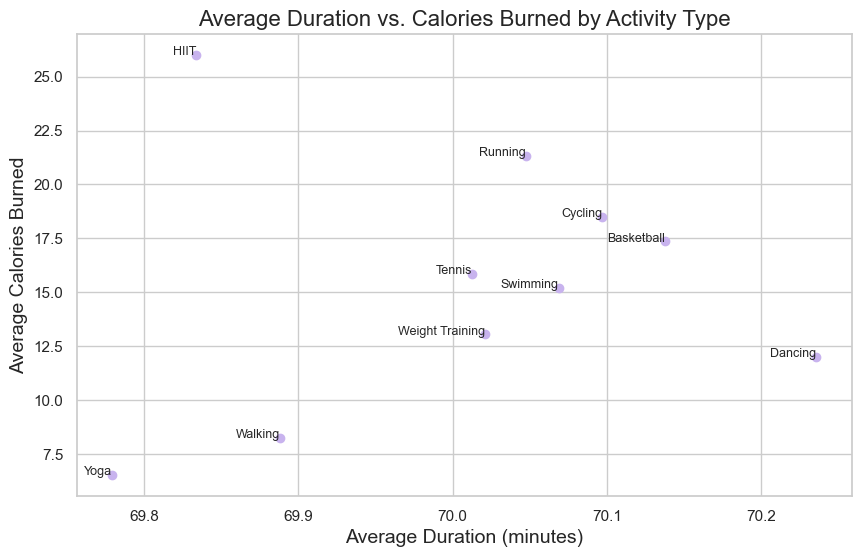

In [156]:
calories_duration = df.groupby('activity_type')[['duration_minutes', 'calories_burned']].mean()
# Ploting the data
plt.figure(figsize=(10, 6))
plt.scatter(calories_duration['duration_minutes'], calories_duration['calories_burned'], color=colormap2[2])

# Adding labels and title
for i, txt in enumerate(calories_duration.index):
    plt.annotate(txt, (calories_duration['duration_minutes'][i], calories_duration['calories_burned'][i]), fontsize=9, ha='right')

plt.title('Average Duration vs. Calories Burned by Activity Type', fontsize=16)
plt.xlabel('Average Duration (minutes)', fontsize=14)
plt.ylabel('Average Calories Burned', fontsize=14)
plt.grid(True)
plt.show()

🔎 
- The average duration for all activities is remarkably **consistent**, hovering around **70 minutes**. 
- The highest calorie-burning activity is **HIIT** with an average of **25.99** calories per minute, making it **the most efficient for burning calories**.
- Activities like **Running (21.33)**, **Cycling (18.50)**, and **Basketball (17.36)** fall in the **middle range for calorie burning**.
- **Walking (8.23) and Yoga (6.51)** are the **least calorie-intensive activities**.

## 💗🤸🏽‍♀️ 2.3 Activity Intensity

In [157]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in the specified columns
outliers_avg_heart_rate = detect_outliers(df, 'avg_heart_rate')
outliers_calories_burned = detect_outliers(df, 'calories_burned')
outliers_stress_level = detect_outliers(df, 'stress_level')
outliers_fitness_level = detect_outliers(df, 'fitness_level')

# Print the number of outliers detected in each column
print(f"Outliers in avg_heart_rate: {len(outliers_avg_heart_rate)}")
print(f"Outliers in calories_burned: {len(outliers_calories_burned)}")
print(f"Outliers in stress_level: {len(outliers_stress_level)}")
print(f"Outliers in fitness_level: {len(outliers_fitness_level)}")
print("-----------------------------")
# Columns to check for outliers
columns_to_check = ['avg_heart_rate', 'calories_burned', 'stress_level', 'fitness_level']

# Calculate the percentage of outliers for each column
outlier_percentages = {}
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    percentage = (len(outliers) / len(df)) * 100
    outlier_percentages[column] = percentage

# Print the percentage of outliers for each column
for column, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in {column}: {percentage:.2f}%")


Outliers in avg_heart_rate: 1867
Outliers in calories_burned: 17441
Outliers in stress_level: 0
Outliers in fitness_level: 0
-----------------------------
Percentage of outliers in avg_heart_rate: 0.27%
Percentage of outliers in calories_burned: 2.54%
Percentage of outliers in stress_level: 0.00%
Percentage of outliers in fitness_level: 0.00%


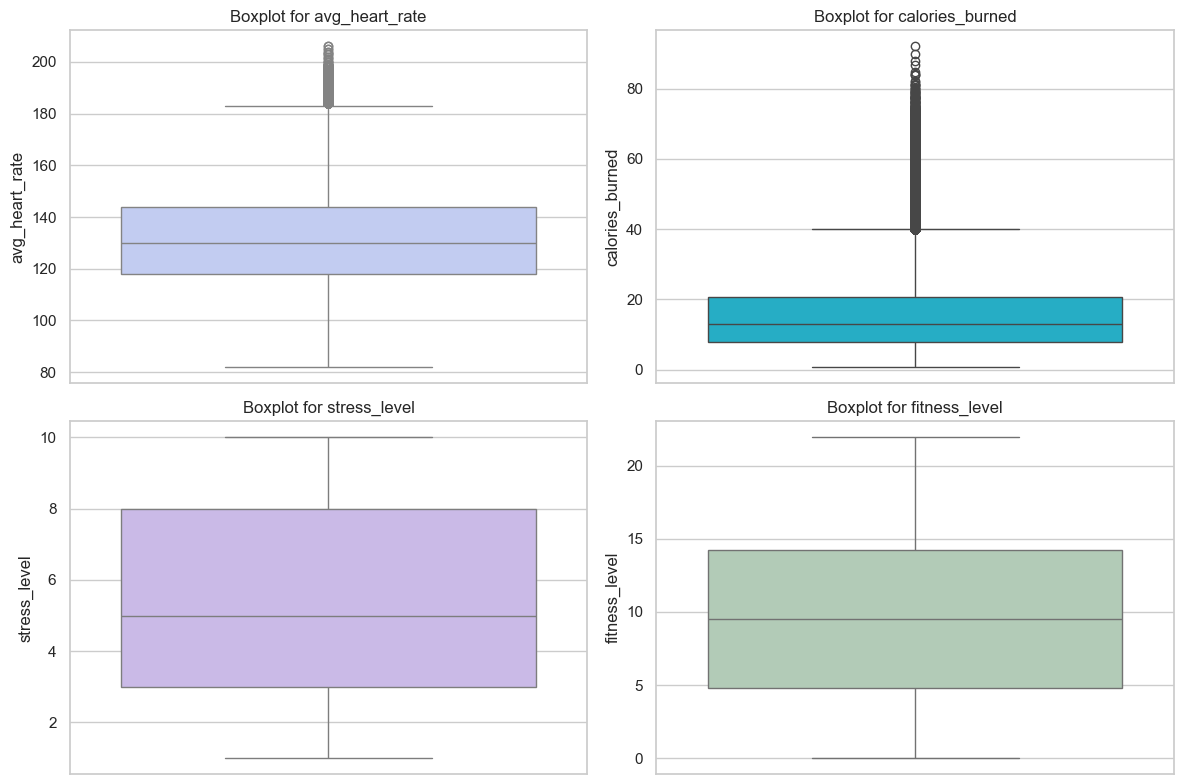

In [158]:
columns_to_check = ['avg_heart_rate', 'calories_burned', 'stress_level', 'fitness_level']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, column, color in zip(axes.flatten(), columns_to_check, colormap2):
    sns.boxplot(y=df[column], ax=ax, color=color)
    ax.set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

🔎 
- There are outliers in **avg_heart_rate and calories_burned columns**.  The percentage of outliers in **avg_heart_rate (0.27%)** and **calories_burned (2.54%)** is small relative to the total dataset. This means their influence on overall averages **is minimal**. Their influence on the overall averages is minimal, though some activities may **naturally result in higher values**.

                 avg_heart_rate  calories_burned  stress_level  fitness_level
activity_type                                                                
Basketball           131.378881        17.357854      5.242413       9.489476
Cycling              131.552271        18.498666      5.247633       9.587444
Dancing              131.389201        11.990842      5.260908       9.522781
HIIT                 131.342265        25.994067      5.253906       9.470517
Running              131.422787        21.327712      5.245439       9.570122
Swimming             131.513964        15.188164      5.246634       9.457232
Tennis               131.497512        15.846564      5.270614       9.530109
Walking              131.385916         8.229493      5.249394       9.518615
Weight Training      131.598570        13.040469      5.250858       9.536904
Yoga                 131.458241         6.506351      5.255785       9.565234


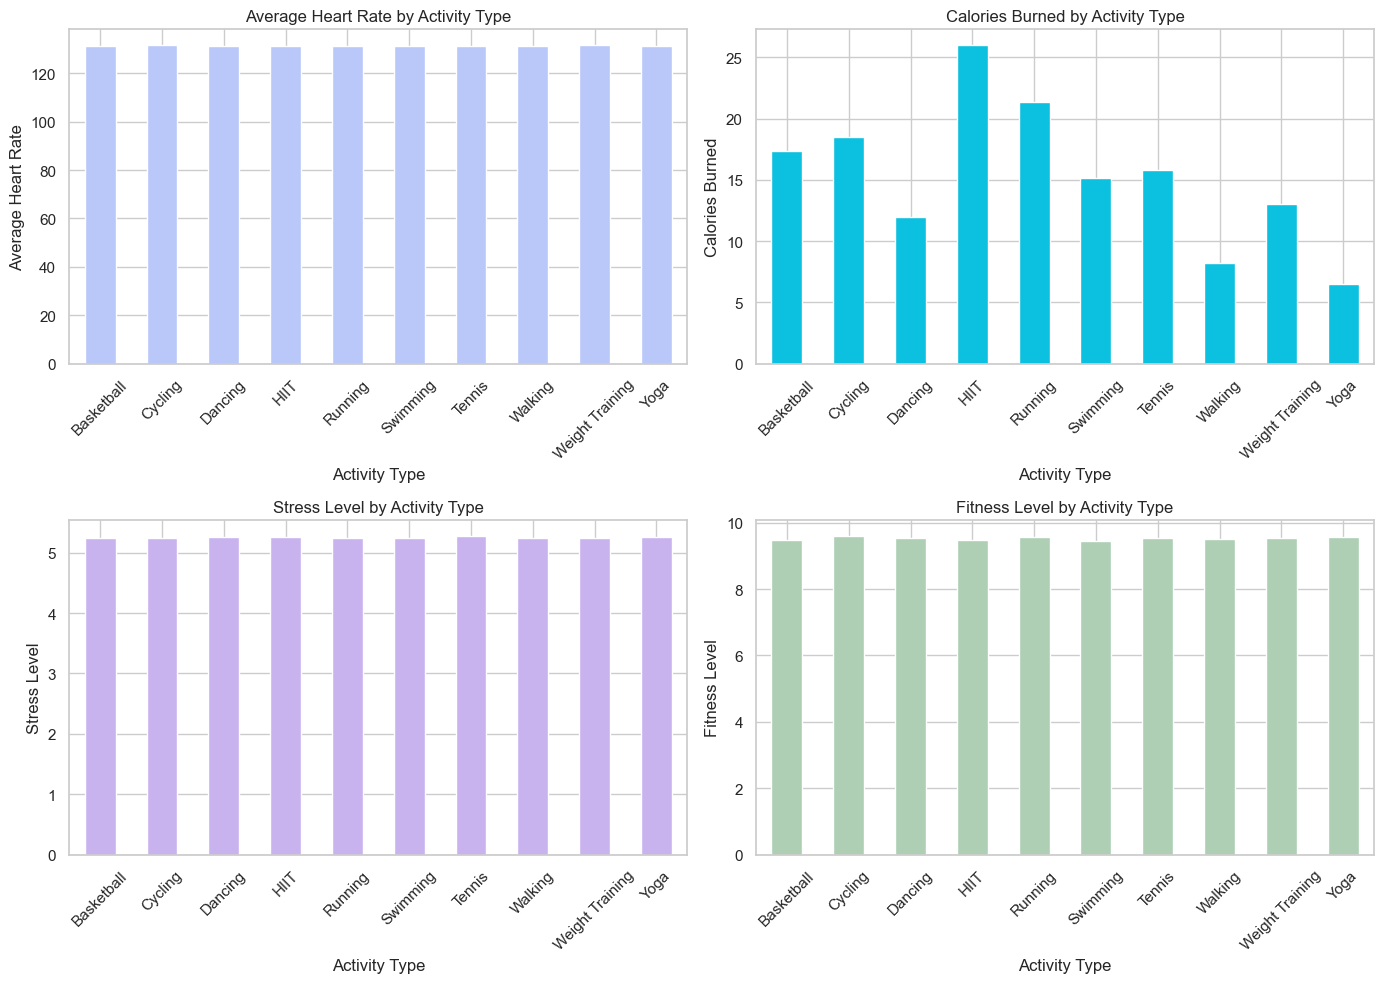

In [159]:
activity_trends = df.groupby('activity_type')[['avg_heart_rate', 'calories_burned', 'stress_level', 'fitness_level']].mean()
print(activity_trends)

# Style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot average heart rate by activity type
activity_trends['avg_heart_rate'].plot(kind='bar', ax=axes[0, 0], color=colormap2[0])
axes[0, 0].set_title('Average Heart Rate by Activity Type')
axes[0, 0].set_xlabel('Activity Type')
axes[0, 0].set_ylabel('Average Heart Rate')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot calories burned by activity type
activity_trends['calories_burned'].plot(kind='bar', ax=axes[0, 1], color=colormap2[1])
axes[0, 1].set_title('Calories Burned by Activity Type')
axes[0, 1].set_xlabel('Activity Type')
axes[0, 1].set_ylabel('Calories Burned')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot stress level by activity type
activity_trends['stress_level'].plot(kind='bar', ax=axes[1, 0], color=colormap2[2])
axes[1, 0].set_title('Stress Level by Activity Type')
axes[1, 0].set_xlabel('Activity Type')
axes[1, 0].set_ylabel('Stress Level')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot fitness level by activity type
activity_trends['fitness_level'].plot(kind='bar', ax=axes[1, 1], color=colormap2[3])
axes[1, 1].set_title('Fitness Level by Activity Type')
axes[1, 1].set_xlabel('Activity Type')
axes[1, 1].set_ylabel('Fitness Level')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

🔎
The data shows that **heart rate remains similar across activities**, while **calories burned vary more significantly**, with **higher values** for activities like **HIIT and Running**. **Stress levels** and **fitness levels** are **relatively consistent across all activities**, with **minimal variation**. High-intensity activities **tend to burn more calories**, while others show steadier heart rates and lower calorie burn.

## 🩺 3. Health Conditions

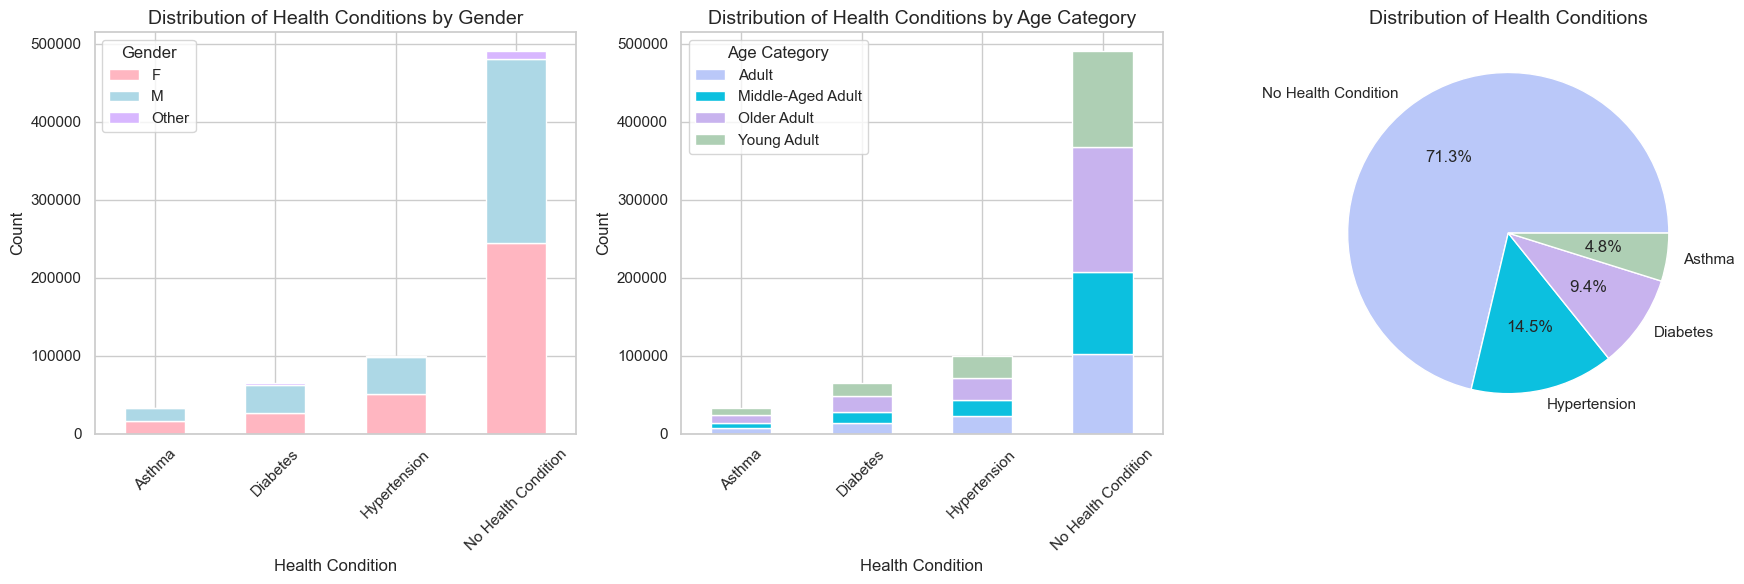

In [160]:
healthcondition_byage = df.groupby(['health_condition', 'age_category']).size().unstack()
healthcondition_bygender = df.groupby(['health_condition', 'gender']).size().unstack()
count_health_conditions = df['health_condition'].value_counts()


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the distribution of health conditions by gender
healthcondition_bygender.plot(kind='bar', stacked=True, color=colormap1, ax=axes[0])
axes[0].set_title('Distribution of Health Conditions by Gender', fontsize=14)
axes[0].set_xlabel('Health Condition', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Gender')

# Plotting the distribution of health conditions by age category
healthcondition_byage.plot(kind='bar', stacked=True, color=colormap2, ax=axes[1])
axes[1].set_title('Distribution of Health Conditions by Age Category', fontsize=14)
axes[1].set_xlabel('Health Condition', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Age Category')

# Plotting the pie chart for health conditions
axes[2].pie(count_health_conditions, labels=count_health_conditions.index, autopct='%1.1f%%', colors=colormap2)
axes[2].set_title('Distribution of Health Conditions', fontsize=14)

plt.tight_layout()
plt.show()

## 😴 4. Sleep 

In [161]:
def categorize_sleep(hours):
    if hours < 5:
        return 'Very Short'
    elif 5 <= hours < 7:
        return 'Short'
    elif 7 <= hours < 9:
        return 'Optimal'
    else:
        return 'Long'

# Apply the categorization function to the 'hours_sleep' column
df['sleep_category'] = df['hours_sleep'].apply(categorize_sleep)

# Display the first few rows to verify the new column
df[['hours_sleep', 'sleep_category']].head()


,hours_sleep,sleep_category
0,6.6,Short
1,8.1,Optimal
2,6.2,Short
3,7.2,Optimal
4,7.1,Optimal


## 😴👩🏽 4.1 Sleep Demographics

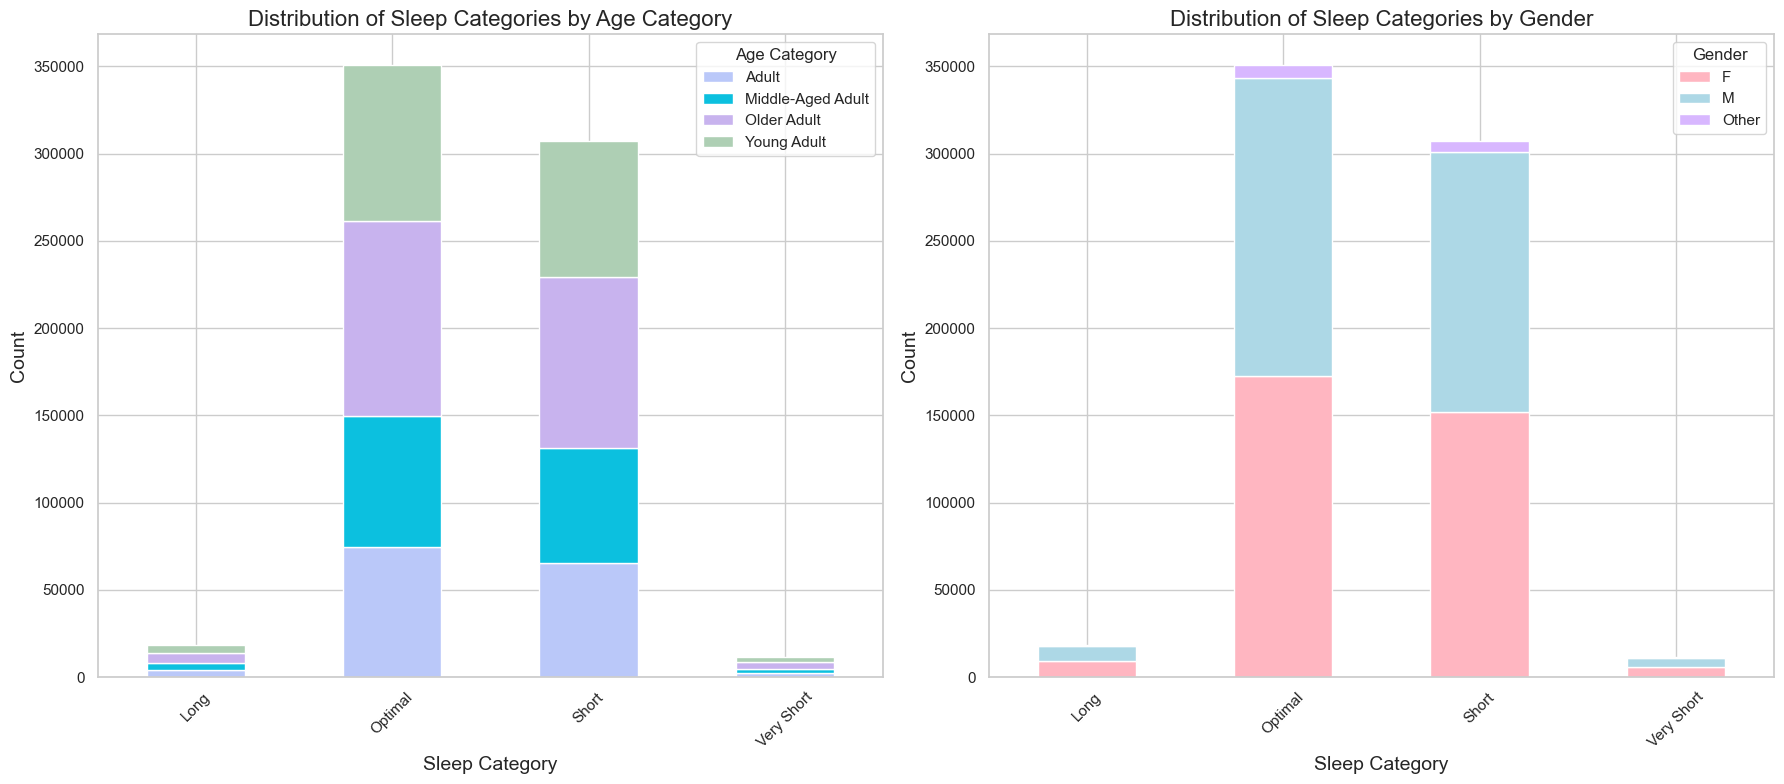

In [162]:
sleep_byage = df.groupby(['sleep_category', 'age_category']).size().unstack()
sleep_bygender = df.groupby(['sleep_category', 'gender']).size().unstack()
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot sleep categories by age category
sleep_byage.plot(kind='bar', stacked=True, color=colormap2, ax=axes[0])
axes[0].set_title('Distribution of Sleep Categories by Age Category', fontsize=16)
axes[0].set_xlabel('Sleep Category', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Age Category')

# Plot sleep categories by gender
sleep_bygender.plot(kind='bar', stacked=True, color=colormap1, ax=axes[1])
axes[1].set_title('Distribution of Sleep Categories by Gender', fontsize=16)
axes[1].set_xlabel('Sleep Category', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Gender')

# Adjust layout
plt.tight_layout()
plt.show()

🔎
- Most people fall into the **Optimal sleep category**, with **Older Adults** and **Young Adults** having the highest numbers. **Short sleep** is also common, **especially among Older Adults** and **Young Adults**, while **Long** and **Very Short sleep** are **less common**. Women tend to sleep more in **Optimal** and **Short categories**, while men have slightly higher counts in the **Very Short category**.

## 😴😡 4.2 Sleep vs Stress

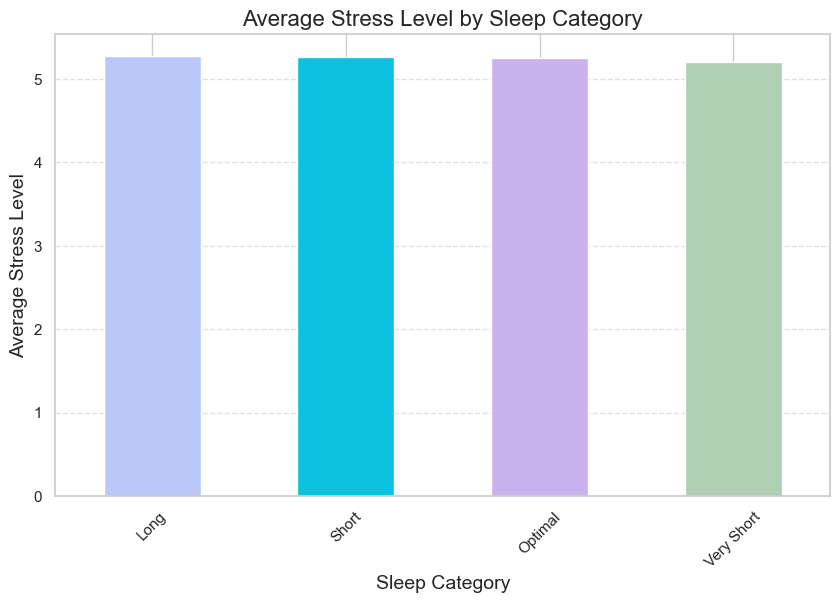

In [76]:
sleep_stress = df.groupby('sleep_category')['stress_level'].mean().sort_values(ascending=False)
# Plotting the average stress level for each sleep category
plt.figure(figsize=(10, 6))
sleep_stress.plot(kind='bar', color=colormap2)

# Adding labels and title
plt.title('Average Stress Level by Sleep Category', fontsize=16)
plt.xlabel('Sleep Category', fontsize=14)
plt.ylabel('Average Stress Level', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.show()

🔎
- The data shows **minimal variation** in stress levels across different sleep categories, with **slightly higher stress** in those who sleep longer **(5.27)** and **slightly lower stress** in those who **sleep very short (5.20)**. Overall, sleep duration **has a small impact on stress levels**.